In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
file_path = r"C:\Users\Admin\Downloads\superstore.xlsx"
data = pd.read_excel(file_path)

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
594,595,US-2021-141257,44414,14-06-2021,Standard Class,CS-11950,Carlos Soltero,Consumer,United States,Seattle,...,98115,West,FUR-CH-10002758,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",585.552,3,0.2,73.1940
595,596,US-2021-108147,44414,13-06-2021,Standard Class,RD-19480,Rick Duston,Consumer,United States,Long Beach,...,11561,East,OFF-BI-10003876,Office Supplies,Binders,"Green Canvas Binder for 8-1/2"" x 14"" Sheets",68.480,2,0.2,25.6800
596,597,US-2021-108147,44414,13-06-2021,Standard Class,RD-19480,Rick Duston,Consumer,United States,Long Beach,...,11561,East,OFF-ST-10003470,Office Supplies,Storage,"Tennsco Snap-Together Open Shelving Units, Sta...",1676.880,6,0.0,83.8440
597,598,US-2021-115812,44445,14-06-2021,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
598,599,US-2021-160262,44445,13-06-2021,Second Class,TS-21205,Thomas Seio,Corporate,United States,North Las Vegas,...,89031,West,FUR-FU-10002685,Furniture,Furnishings,"Executive Impressions 13-1/2"" Indoor/Outdoor W...",37.400,2,0.0,14.2120


In [ ]:
data.shape

(599, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          599 non-null    int64  
 1   Order ID        599 non-null    object 
 2   Order Date      599 non-null    object 
 3   Ship Date       599 non-null    object 
 4   Ship Mode       599 non-null    object 
 5   Customer ID     599 non-null    object 
 6   Customer Name   599 non-null    object 
 7   Segment         599 non-null    object 
 8   Country/Region  599 non-null    object 
 9   City            599 non-null    object 
 10  State/Province  599 non-null    object 
 11  Postal Code     599 non-null    object 
 12  Region          599 non-null    object 
 13  Product ID      599 non-null    object 
 14  Category        599 non-null    object 
 15  Sub-Category    599 non-null    object 
 16  Product Name    599 non-null    object 
 17  Sales           599 non-null    flo

In [ ]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [ ]:
data.count()

Row ID            599
Order ID          599
Order Date        599
Ship Date         599
Ship Mode         599
Customer ID       599
Customer Name     599
Segment           599
Country/Region    599
City              599
State/Province    599
Postal Code       599
Region            599
Product ID        599
Category          599
Sub-Category      599
Product Name      599
Sales             599
Quantity          599
Discount          599
Profit            599
dtype: int64

In [ ]:
data = data.dropna()
data.count()

Row ID            599
Order ID          599
Order Date        599
Ship Date         599
Ship Mode         599
Customer ID       599
Customer Name     599
Segment           599
Country/Region    599
City              599
State/Province    599
Postal Code       599
Region            599
Product ID        599
Category          599
Sub-Category      599
Product Name      599
Sales             599
Quantity          599
Discount          599
Profit            599
dtype: int64

In [ ]:
print(data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [ ]:
Feature Scaling and Target Label Creation

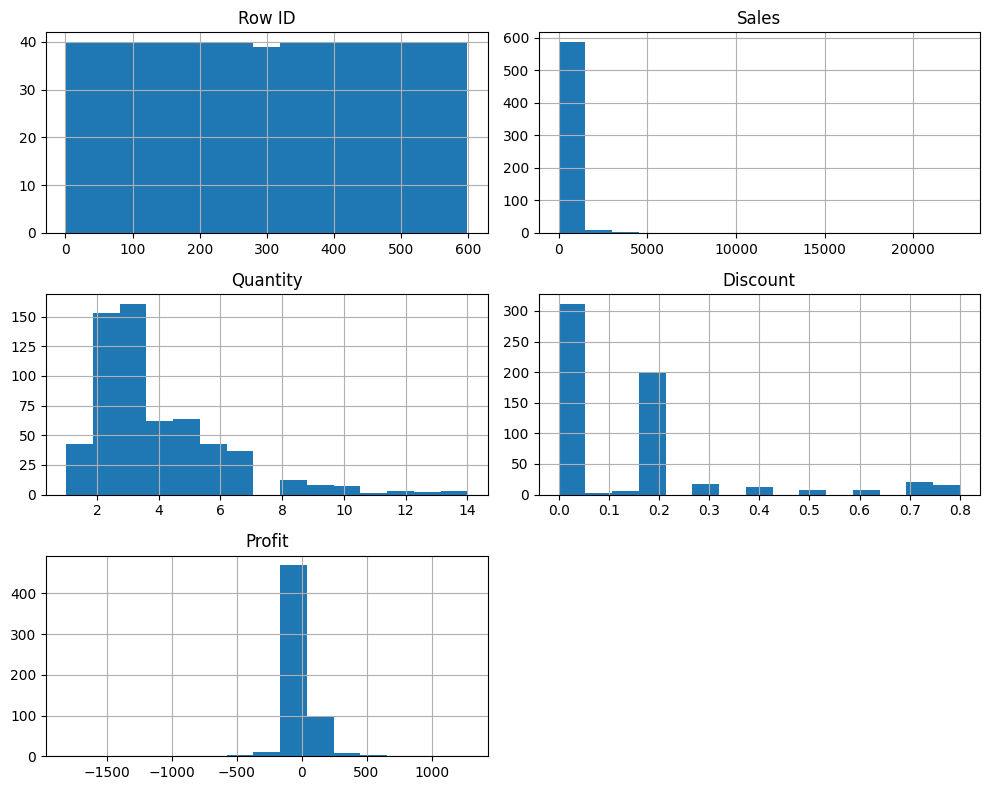

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols].hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()


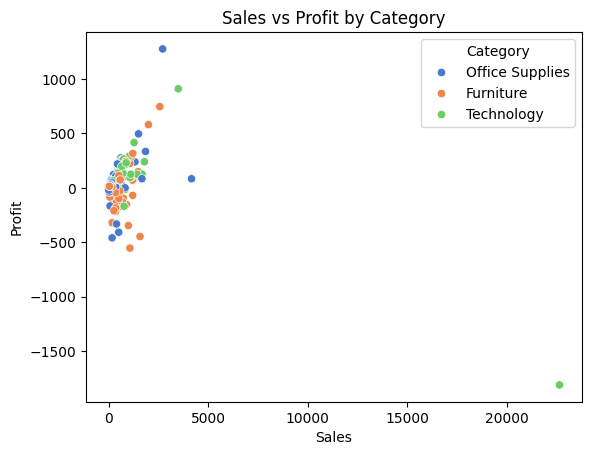

In [ ]:
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Category', palette='muted')
plt.title('Sales vs Profit by Category')
plt.show()

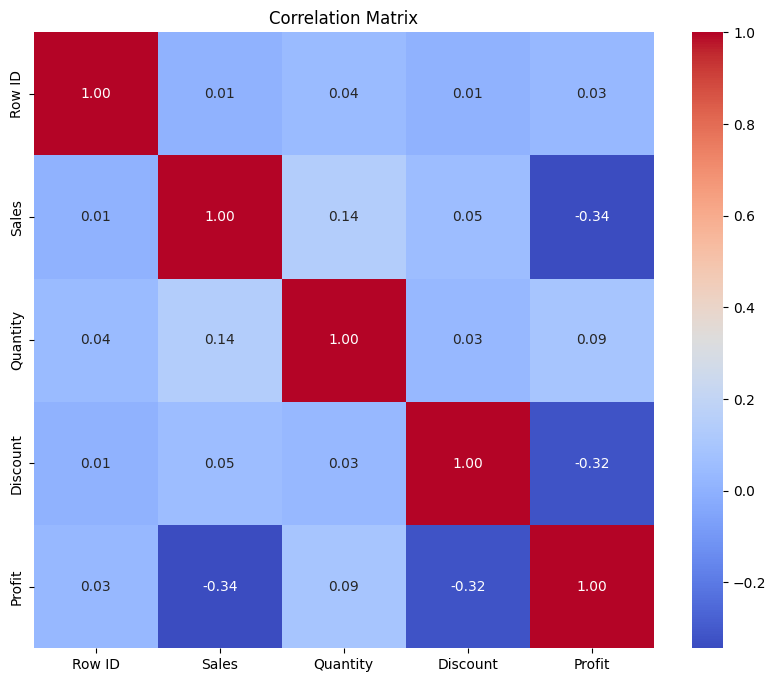

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Interpretation
The code begins by selecting only the numeric columns from the dataset using select_dtypes(include=['float64', 'int64']),
ensuring that only valid data types are used for the correlation calculation. The numeric_data.corr() function computes
the pairwise correlation between the numeric columns, generating a matrix of
correlation coefficients. The sns.heatmap visualizes this matrix with color intensity indicating the strength and direction
of correlations, where annot=True displays the numerical values directly on the plot, and cmap='coolwarm' uses a gradient
color scheme for clarity. The title, added with plt.title(), and plt.show() render the chart, making it easier to interpret
relationships among numeric variables visually.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ensure the dataset has the necessary columns
required_columns = ['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Region', 'Profit']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    raise ValueError(f"The dataset is missing the following required columns: {missing_columns}")

# Create the 'Profitable' target variable based on the 'Profit' column
data['Profitable'] = (data['Profit'] > 0).astype(int)

# Select features and target
features = ['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Region']
X = data[features]
y = data['Profitable']

# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()
for col in ['Category', 'Sub-Category', 'Region']:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features for GaussianNB
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[['Sales', 'Quantity', 'Discount']] = scaler.fit_transform(X_scaled[['Sales', 'Quantity', 'Discount']])


In [ ]:
Interpretation
The data preprocessing ensures compatibility with machine learning models
by selecting key features and transforming the dataset. First, necessary
columns are validated to prevent missing data issues. A binary target variable,
Profitable, is created for classification, representing profitable and non-profitable
transactions. Categorical variables like Category are encoded into numeric values, and
numerical features like Sales are standardized to maintain consistent scaling.
This comprehensive preparation ensures the dataset is ready for training efficient and accurate classifiers.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate
gnb_acc = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy: {gnb_acc:.2f}")


GaussianNB Accuracy: 0.93


In [ ]:
Interpretation:
The Gaussian Naive Bayes model is trained on numerical features, and its accuracy on the test set is calculated.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on test data
y_pred_mnb = mnb.predict(X_test)

# Evaluate the model
mnb_acc = accuracy_score(y_test, y_pred_mnb)
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
class_report = classification_report(y_test, y_pred_mnb)

# Print evaluation metrics
print(f"MultinomialNB Accuracy: {mnb_acc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


MultinomialNB Accuracy: 0.72

Confusion Matrix:
[[ 3 16]
 [17 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.16      0.15        19
           1       0.84      0.83      0.84       101

    accuracy                           0.72       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.73      0.72      0.73       120



In [ ]:
Interpretation:
The dataset is split into training (70%) and testing (30%) sets. Stratified sampling ensures
that the target variable's class distribution is maintained in both sets.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate
gnb_acc = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy: {gnb_acc:.2f}")


GaussianNB Accuracy: 0.89


In [ ]:
Interpretation:
The Gaussian Naive Bayes model is trained on numerical features, and its accuracy on the test set is calculated.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluate
mnb_acc = accuracy_score(y_test, y_pred_mnb)
print(f"MultinomialNB Accuracy: {mnb_acc:.2f}")


MultinomialNB Accuracy: 0.72


In [ ]:
Train and Evaluate Multinomial Naive Bayes
Interpretation:
The Multinomial Naive Bayes model is trained using encoded features, and its accuracy on the test set is calculated.



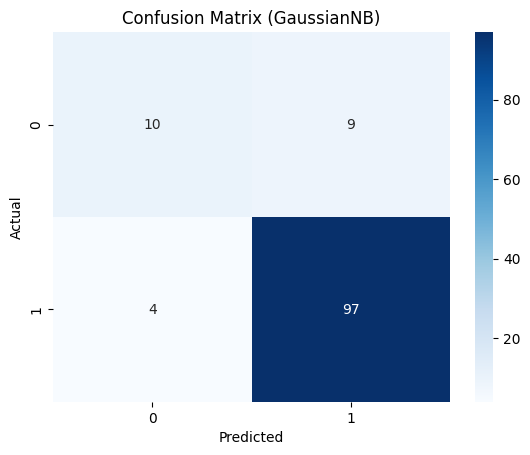

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for GaussianNB
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GaussianNB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
Interpretation:
The confusion matrix visually evaluates the classifier’s prediction performance in terms of true positives,
true negatives, false positives, and false negatives.



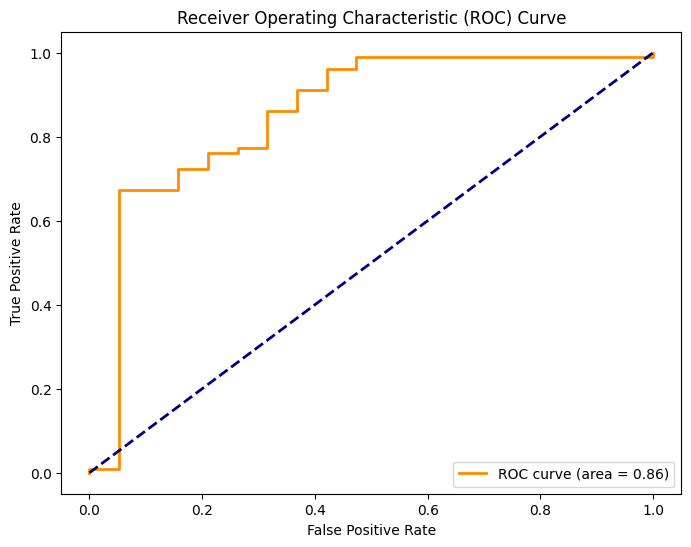

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for GaussianNB
fpr, tpr, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
ROC Curve and AUC
Interpretation:
The ROC curve measures the classifier's ability to distinguish between classes.
The AUC (Area Under Curve) quantifies the overall performance, with 1.0 being perfect.


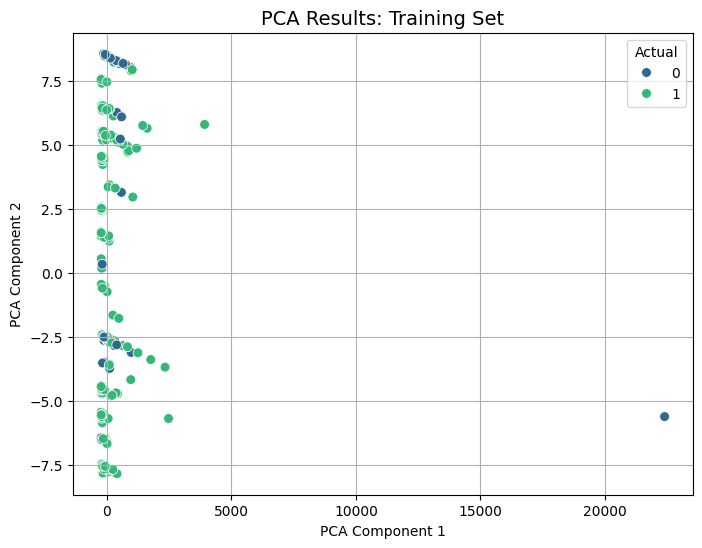

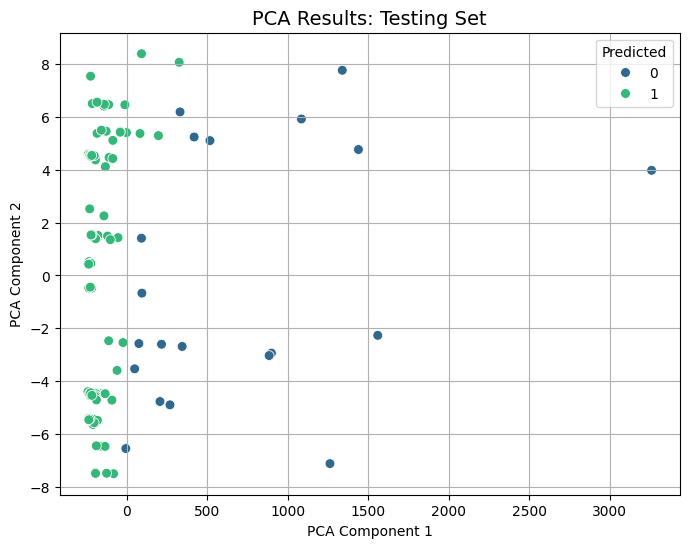

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a DataFrame for the training set
train_df = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2'])
train_df['Actual'] = y_train.reset_index(drop=True)  # Reset index to match

# Plot PCA results for training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Actual', data=train_df, palette='viridis', s=50)
plt.title('PCA Results: Training Set', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Actual', loc='best')
plt.grid(True)
plt.show()

# Create a DataFrame for the testing set
test_df = pd.DataFrame(data=X_test_pca, columns=['PCA1', 'PCA2'])
test_df['Actual'] = y_test.reset_index(drop=True)  # Reset index to match
test_df['Predicted'] = y_pred_mnb  # Use predictions from MultinomialNB

# Plot PCA results for testing set
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Predicted', data=test_df, palette='viridis', s=50)
plt.title('PCA Results: Testing Set', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Predicted', loc='best')
plt.grid(True)
plt.show()


In [ ]:
Inference:
We use PCA to reduce the features to 2 principal components for visualization.
We plot the training set results with actual labels to see how well-separated the
classes are, and plot the test set results with predicted labels to evaluate the classifier's performance visually.

Training Set Results: Observation: The PCA plot for the training set shows that there is
significant overlap between the clusters, it may indicate that the features are not adequately
    capturing the differences between the classes, and additional feature engineering may be needed.

Testing Set Results: Observation: The PCA plot for the test set shows that there
are many points where the predicted class does not match the actual class (evident from the hue differences),
it suggests that the model's performance on the test set is not as good as on the training set, indicating potential
overfitting or the need for additional data or model tuning.

